# Assignment 1

First we need to import a few modules, execute the cell below:

In [7]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline


Define a function `f` that is equivalent to $f(x)=\cos(x)$. It should work both for single arguments and `numpy` arrays.

In [39]:
def f(x):
    return numpy.cos(x);









#CHECK
x = numpy.array([3.14,0,-3.14])
y = f(x)
print(y)

e = numpy.isclose(f(0.5),0.87758256189)
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
r = numpy.isclose(
            f(xs), 
            [0.99500417, 0.98006658, 0.95533649, 0.92106099, 0.87758256, 0.82533561]
        ).all()
print(e)
print(r)

[-0.99999873  1.         -0.99999873]
True
True


You can use the following cell to check that your code works for scalar arguments:

In [35]:
assert numpy.isclose(f(0.5),0.87758256189)

Make sure your code also works with a numpy array:

In [36]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            f(xs), 
            [0.99500417, 0.98006658, 0.95533649, 0.92106099, 0.87758256, 0.82533561]
        ).all()

Define the analytic derivative of the function`f` here (again, it should work both for single numbers and numpy arrays).

In [38]:
def df_analytic(x):
    return -numpy.sin(x);










#CHECK
p = numpy.isclose(df_analytic(0.5), -0.4794255386)
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
w = numpy.isclose(
            df_analytic(xs),
            [-0.09983342, -0.19866933, -0.29552021, -0.38941834, -0.47942554,-0.56464247]
        ).all()
print(p)
print(w)

True
True


In [12]:
assert numpy.isclose(df_analytic(0.5), -0.4794255386)

In [13]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            df_analytic(xs),
            [-0.09983342, -0.19866933, -0.29552021, -0.38941834, -0.47942554,-0.56464247]
        ).all()

Now define the numerical derivative using the backward difference method. The function `backward_difference` takes three arguments, `f`, the function to calculate the derivative for, `x` the position to calculate the derivative at and `dx` the interval length.

In [37]:
def backward_difference(f, x, dx):
    y = (f(x)-f(x-dx))/dx
    return y;











#CHECK

q = numpy.isclose(
    backward_difference(f, 0.1, 0.0001),
    -0.09978366627194646
)


print(q)

True


In [26]:
assert numpy.isclose(
    backward_difference(f, 0.1, 0.0001),
    -0.09978366627194646
)

**Task 1:**

Here is a skeleton code to plot the difference between the analytical derivative and the numerical implementation. Modify and expand it to provide a plot with three curves for the difference for a case where $dx$ is too large, about right and too small. The plot should have a legend, labelled axes and a title.

You can get help about plotting on the Python handbook that you can find at:

https://dmaitre.phyip3.dur.ac.uk/notes/l1python/part-5/


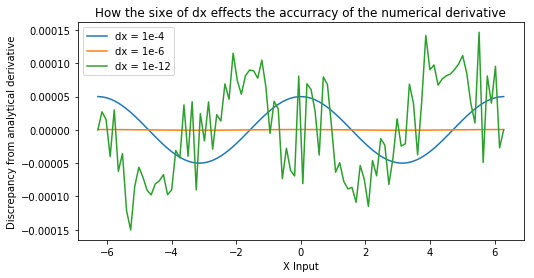

In [25]:
xs = numpy.linspace(-2*numpy.pi,2*numpy.pi,100)
df_dx_1 = backward_difference(f, xs, dx=1e-4)
df_dx_2 = backward_difference(f, xs, dx=1e-6)
df_dx_3 = backward_difference(f, xs, dx=1e-12)
df_dx_analytical = df_analytic(xs)
plt.figure(figsize=(8, 4))
plt.plot(xs, df_dx_1 - df_dx_analytical)
plt.plot(xs, df_dx_2 - df_dx_analytical)
plt.plot(xs, df_dx_3 - df_dx_analytical)
plt.xlabel("X Input")
plt.ylabel("Discrepancy from analytical derivative")
plt.legend(["dx = 1e-4","dx = 1e-6","dx = 1e-12"])
plt.title("How the sixe of dx effects the accurracy of the numerical derivative")
plt.show()

**Task 2: ** 

Describe in the text box below why the numerical method looses accuracy in the case where
$\Delta x$ is too small and the case where $\Delta x$ is too large. (Double-click on "YOUR ANSWER HERE" to edit.)


When $Δx$ is too large, for example in this case the blue line ($Δx = 10^{-4}$), the numerical method loses accuracy as each sucessive jump $Δx$ skips large sections of the function where the behaviour of the function changes. This loss of information results in a periodic discrepency from the value of the analytical derivative, as the numerical method overpredicts then underpredicts as it tries to extrapolate the gradient it has found onto a function that has changed too much in the large $Δx$.

When $Δx$ is too small, for example in this case the green line ($Δx = 10^{-12}$), the predictions accumulate large and random errors as the computer struggles to store the very small numbers to high accuracy. With each number the computer will wipe digits beyond a certain point, then randomly reasign them if they are required later in the calculation.